In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from importnb import imports
with imports("ipynb"):
    from epias import get_data

In [5]:
df = pd.DataFrame(data['body']['smpList'])

In [14]:
df["hour"] = df["date"].apply(lambda x: x[11:13])
df.head()

,date,price,smpDirection,smpDirectionId,nextHour,hour
0,2019-01-01T00:00:00.000+0300,5.00,YAT,3,2019-01-01T01:00:00.000+0300,00
1,2019-01-01T01:00:00.000+0300,95.04,YAT,3,2019-01-01T02:00:00.000+0300,01
2,2019-01-01T02:00:00.000+0300,79.60,YAT,3,2019-01-01T03:00:00.000+0300,02
3,2019-01-01T03:00:00.000+0300,0.00,YAT,3,2019-01-01T04:00:00.000+0300,03
4,2019-01-01T04:00:00.000+0300,0.00,YAT,3,2019-01-01T05:00:00.000+0300,04


In [7]:
bpm_data = get_data('bpm_order_summary', start_date, end_date)

In [46]:
required_data = ['bpm_order_summary', 'smp', 'mcp', 'dam_volume', 'idm_aof']
start_date = '2019-01-01'
end_date = '2019-12-31'

In [47]:
bpm_data = get_data('bpm_order_summary', start_date, end_date)
bpm_data = pd.DataFrame(bpm_data['body']['bpmOrderSummaryList'])
bpm_data["hour"] = bpm_data["date"].apply(lambda x: x[11:13])
bpm_data["date"] = pd.to_datetime(bpm_data["date"])
bpm_data.head()

,date,net,upRegulationZeroCoded,upRegulationOneCoded,upRegulationTwoCoded,downRegulationZeroCoded,downRegulationOneCoded,downRegulationTwoCoded,upRegulationDelivered,downRegulationDelivered,direction,nextHour,hour
0,2019-01-01 00:00:00+03:00,-1934.80,0.0,0.0,0,2288.57,0.0,0,0.0,-1934.80,ENERGY_SURPLUS,2019-01-01T01:00:00.000+0300,00
1,2019-01-01 01:00:00+03:00,-750.87,0.0,0.0,0,808.08,0.0,0,0.0,-750.87,ENERGY_SURPLUS,2019-01-01T02:00:00.000+0300,01
2,2019-01-01 02:00:00+03:00,-982.77,0.0,0.0,0,1060.75,0.0,0,0.0,-982.77,ENERGY_SURPLUS,2019-01-01T03:00:00.000+0300,02
3,2019-01-01 03:00:00+03:00,-764.62,0.0,0.0,0,1120.48,0.0,0,0.0,-764.62,ENERGY_SURPLUS,2019-01-01T04:00:00.000+0300,03
4,2019-01-01 04:00:00+03:00,-1233.29,0.0,0.0,0,1874.63,56.0,0,0.0,-1233.29,ENERGY_SURPLUS,2019-01-01T05:00:00.000+0300,04


In [48]:
smp_data = get_data('smp', start_date, end_date)
smp_data = pd.DataFrame(smp_data['body']['smpList'])
smp_data["hour"] = smp_data["date"].apply(lambda x: x[11:13])
smp_data["date"] = pd.to_datetime(smp_data["date"])
smp_data.head()

,date,price,smpDirection,smpDirectionId,nextHour,hour
0,2019-01-01 00:00:00+03:00,5.00,YAT,3,2019-01-01T01:00:00.000+0300,00
1,2019-01-01 01:00:00+03:00,95.04,YAT,3,2019-01-01T02:00:00.000+0300,01
2,2019-01-01 02:00:00+03:00,79.60,YAT,3,2019-01-01T03:00:00.000+0300,02
3,2019-01-01 03:00:00+03:00,0.00,YAT,3,2019-01-01T04:00:00.000+0300,03
4,2019-01-01 04:00:00+03:00,0.00,YAT,3,2019-01-01T05:00:00.000+0300,04


In [49]:
mcp_data = get_data('mcp', start_date, end_date)
mcp_data = pd.DataFrame(mcp_data['body']['dayAheadMCPList'])
mcp_data["hour"] = mcp_data["date"].apply(lambda x: x[11:13])
mcp_data["date"] = pd.to_datetime(mcp_data["date"])
mcp_data['exchangeRate'] = mcp_data['price'] / mcp_data['priceUsd']
mcp_data.head()

,date,price,priceUsd,priceEur,hour,exchangeRate
0,2019-01-01 00:00:00+03:00,100.38,19.01,16.61,00,5.280379
1,2019-01-01 01:00:00+03:00,96.72,18.31,16.01,01,5.282359
2,2019-01-01 02:00:00+03:00,81.60,15.45,13.51,02,5.281553
3,2019-01-01 03:00:00+03:00,38.58,7.31,6.39,03,5.277702
4,2019-01-01 04:00:00+03:00,11.52,2.18,1.91,04,5.284404


In [50]:
dam_data = get_data('dam_volume', start_date, end_date)
dam_data = pd.DataFrame(dam_data['body']['dayAheadMarketVolumeList'])
dam_data["hour"] = dam_data["date"].apply(lambda x: x[11:13])
dam_data["date"] = pd.to_datetime(dam_data["date"])
dam_data.head()

,date,quantityOfAsk,volume,quantityOfBid,priceIndependentBid,priceIndependentOffer,blockBid,blockOffer,matchedBids,matchedOffers,period,periodType,hour
0,2019-01-01 00:00:00+03:00,19880.6,13309.6,33249.3,10342.4,12830.2,1747.8,192.0,13309.6,13309.7,0,None,00
1,2019-01-01 01:00:00+03:00,18660.2,13272.2,34729.0,10483.3,12816.2,1747.8,192.0,13272.2,13272.2,0,None,01
2,2019-01-01 02:00:00+03:00,17249.8,12777.1,36011.0,9800.5,11970.1,1747.8,522.0,12777.1,12777.1,0,None,02
3,2019-01-01 03:00:00+03:00,16207.6,12858.0,36243.3,8771.9,12199.7,1747.8,522.0,12858.0,12858.0,0,None,03
4,2019-01-01 04:00:00+03:00,15672.8,13008.9,36614.6,8301.4,12522.7,1747.8,394.0,13008.9,13008.8,0,None,04


In [51]:
idm_aof = get_data('idm_aof', start_date, end_date)
idm_aof = pd.DataFrame(idm_aof['body']['idmAofList'])
idm_aof["hour"] = idm_aof["date"].apply(lambda x: x[11:13])
idm_aof["date"] = pd.to_datetime(idm_aof["date"])
idm_aof.head()

,date,price,hour
0,2019-01-01 00:00:00+03:00,100.23,00
1,2019-01-01 01:00:00+03:00,96.85,01
2,2019-01-01 02:00:00+03:00,80.25,02
3,2019-01-01 03:00:00+03:00,38.28,03
4,2019-01-01 04:00:00+03:00,11.67,04


In [58]:
df = pd.DataFrame()
df.columns = ['date', 'hour', 'netImbalanceVolume', 'smp', 'mcp', 'mcpUsd', 'damVolume', 'idm', 'upRegulationZeroCoded', 'downRegulationZeroCoded', 'upRegulationDelivered', 'downRegulationDelivered', 'exchangeRate']

""


In [113]:
for i in range(len(idm_aof)):
    # Set date of df
    df.loc[i, 'date'] = idm_aof.loc[i, 'date']
    df.loc[i, 'hour'] = idm_aof.loc[i, 'hour']
    df.loc[i, 'netImbalanceVolume'] = bpm_data.loc[i, 'net']
    df.loc[i, 'smp'] = smp_data.loc[i, 'price']
    df.loc[i, 'mcp'] = mcp_data.loc[i, 'price']
    df.loc[i, 'damVolume'] = dam_data.loc[i, 'volume']
    df.loc[i, 'idm'] = idm_aof.loc[i, 'price']
    df.loc[i, 'upRegulationZeroCoded'] = bpm_data.loc[i, 'upRegulationZeroCoded']
    df.loc[i, 'downRegulationZeroCoded'] = bpm_data.loc[i, 'downRegulationZeroCoded']
    df.loc[i, 'upRegulationDelivered'] = bpm_data.loc[i, 'upRegulationDelivered']
    df.loc[i, 'downRegulationDelivered'] = bpm_data.loc[i, 'downRegulationDelivered']
    if mcp_data.loc[i, 'price'] > 1:
        df.loc[i, 'exchangeRate'] = mcp_data.loc[i, 'exchangeRate']
    else:
        df.loc[i, 'exchangeRate'] = df.loc[i - 1, 'exchangeRate']
        
        


In [145]:
df['smpUsd'] = df['smp'] / df['exchangeRate']
df['mcpUsd'] = df['mcp'] / df['exchangeRate']
df.to_csv('./data/data2019.csv', index=False)

In [66]:
df['ImbalanceToVolumeRatio'] = df['netImbalanceVolume'] / df['damVolume']

In [144]:
df.head()

,date,hour,netImbalanceVolume,smp,mcp,damVolume,idm,upRegulationZeroCoded,downRegulationZeroCoded,upRegulationDelivered,downRegulationDelivered,exchangeRate,smpUsd,ImbalanceToVolumeRatio
0,2019-01-01 00:00:00+03:00,00,-1934.80,5.00,100.38,13309.6,100.23,0.0,2288.57,0.0,-1934.80,5.280379,0.946902,-0.145369
1,2019-01-01 01:00:00+03:00,01,-750.87,95.04,96.72,13272.2,96.85,0.0,808.08,0.0,-750.87,5.282359,17.991960,-0.056575
2,2019-01-01 02:00:00+03:00,02,-982.77,79.60,81.60,12777.1,80.25,0.0,1060.75,0.0,-982.77,5.281553,15.071324,-0.076917
3,2019-01-01 03:00:00+03:00,03,-764.62,0.00,38.58,12858.0,38.28,0.0,1120.48,0.0,-764.62,5.277702,0.000000,-0.059466
4,2019-01-01 04:00:00+03:00,04,-1233.29,0.00,11.52,13008.9,11.67,0.0,1874.63,0.0,-1233.29,5.284404,0.000000,-0.094804


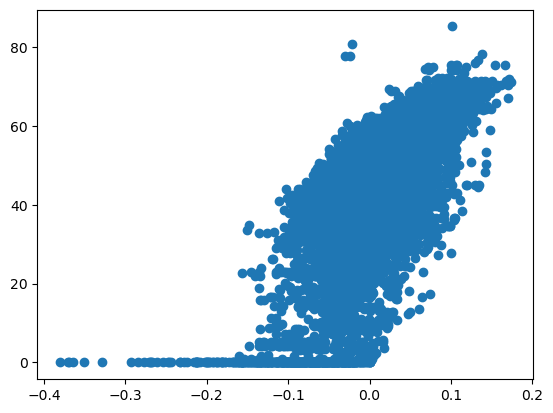

In [116]:
plt.scatter(df['ImbalanceToVolumeRatio'], df['smpUsd'])

In [161]:
smp_mcp_ratio = df['smpUsd'] / df['mcpUsd']

In [167]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import svm

imbalance_volume_ratio = df['ImbalanceToVolumeRatio'].values.reshape(-1, 1)
imbalance_volume = df['netImbalanceVolume'].values.reshape(-1, 1)
mcpUsd = df['mcpUsd'].values.reshape(-1, 1)
hour = df['hour'].values.reshape(-1, 1)
# Add both to X 
X = np.hstack((imbalance_volume_ratio, imbalance_volume, mcpUsd, hour))
y = df['smpUsd'].values.reshape(-1, 1)

reg = LinearRegression().fit(X, y)

In [168]:
reg.score(X, y)

0.8742948214760239

In [155]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [128]:
regr = svm.SVR()
regr.fit(X, y)

/opt/anaconda3/envs/bitirme/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [129]:
regr.score(X, y)

0.4395011048960019

In [130]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X, y)

KNeighborsRegressor(n_neighbors=10)

In [132]:
neigh.score(X, y)

0.543642136801904

In [171]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X, y)
regr.score(X, y)

/opt/anaconda3/envs/bitirme/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9895780573206134